In [44]:
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime 
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report,accuracy_score

In [45]:
df=pd.read_csv(r"C:\Users\so\Downloads\Fraud.csv")

In [46]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [48]:
#find Fraud Data and Actual Data
Total_transactions = len(df)
normal = len(df[df.isFraud == 0])
fraudulent = len(df[df.isFraud == 1])
fraud_percentage = round(fraudulent/normal*100, 2)
print('Total number of Trnsactions are {}'.format(Total_transactions))
print('Number of Normal Transactions are {}'.format(normal))
print('Number of fraudulent Transactions are {}'.format(fraudulent))
print('Percentage of fraud Transactions is {}'.format(fraud_percentage))


Total number of Trnsactions are 6362620
Number of Normal Transactions are 6354407
Number of fraudulent Transactions are 8213
Percentage of fraud Transactions is 0.13


In [49]:
#df.drop(['step', 'isFlaggedFraud','amount'], axis=1, inplace=True)
#Data is imbalanced 

In [50]:
df.head(20)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [51]:
#Find null values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

<AxesSubplot:>

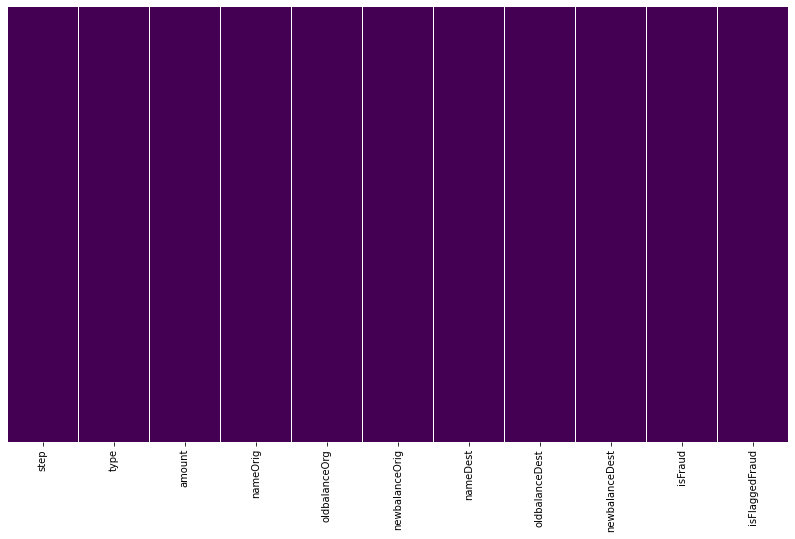

In [52]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [53]:
fraud=df[df['isFraud']==1]
normal=df[df['isFraud']==0]
print(fraud.shape,normal.shape)

(8213, 11) (6354407, 11)


In [54]:
fraud.amount.describe()

count    8.213000e+03
mean     1.467967e+06
std      2.404253e+06
min      0.000000e+00
25%      1.270913e+05
50%      4.414234e+05
75%      1.517771e+06
max      1.000000e+07
Name: amount, dtype: float64

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction IsFraud')
bins = 100
ax1.hist(fraud.amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.amount,bins = bins)
ax2.set_title('Normal')
plt.xlabel('amount')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show()

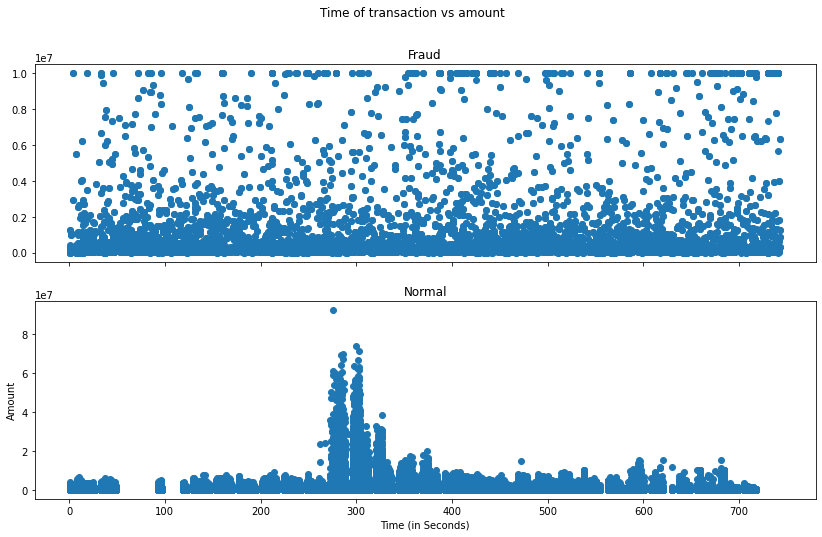

In [56]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs amount')
ax1.scatter(fraud.step, fraud.amount)
ax1.set_title('Fraud')
ax2.scatter(normal.step, normal.amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [57]:
df['nameOrig']=df['nameOrig'].astype(str).str[0]
df['nameDest']=df['nameDest'].astype(str).str[0]
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C,170136.0,160296.36,M,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C,21249.0,19384.72,M,0.0,0.0,0,0
2,1,TRANSFER,181.00,C,181.0,0.00,C,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C,181.0,0.00,C,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C,41554.0,29885.86,M,0.0,0.0,0,0


In [58]:
#As all nameOrig is C .COnverting catagorical feature into number
df['nameOrig'].value_counts()


C    6362620
Name: nameOrig, dtype: int64

In [59]:
df['nameDest'].value_counts()

C    4211125
M    2151495
Name: nameDest, dtype: int64

In [60]:
df.groupby(['nameDest'])['isFraud'].mean()

nameDest
C    0.00195
M    0.00000
Name: isFraud, dtype: float64

In [61]:
ordinal_labels=df.groupby(['nameDest'])['isFraud'].mean().sort_values().index
ordinal_labels

Index(['M', 'C'], dtype='object', name='nameDest')

In [62]:
ordinal_labels2={k:i for i,k in enumerate (ordinal_labels,0)}
ordinal_labels2

{'M': 0, 'C': 1}

In [63]:
df['nameDest']=df['nameDest'].map(ordinal_labels2)
df['nameOrig']=df['nameOrig'].map(ordinal_labels2)
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,1,170136.0,160296.36,0,0.0,0.0,0,0
1,1,PAYMENT,1864.28,1,21249.0,19384.72,0,0.0,0.0,0,0
2,1,TRANSFER,181.00,1,181.0,0.00,1,0.0,0.0,1,0
3,1,CASH_OUT,181.00,1,181.0,0.00,1,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,1,41554.0,29885.86,0,0.0,0.0,0,0


In [64]:
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [65]:
dictionary_type={'CASH_OUT':1,'PAYMENT':2,'CASH_IN':3,'TRANSFER':4,'DEBIT':5}

In [66]:
df['type']=df['type'].map(dictionary_type)
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,1,170136.0,160296.36,0,0.0,0.0,0,0
1,1,2,1864.28,1,21249.0,19384.72,0,0.0,0.0,0,0
2,1,4,181.00,1,181.0,0.00,1,0.0,0.0,1,0
3,1,1,181.00,1,181.0,0.00,1,21182.0,0.0,1,0
4,1,2,11668.14,1,41554.0,29885.86,0,0.0,0.0,0,0


In [67]:
#As nameOrig and isFlaggedFraud have one value.Values are not changing
df.drop(['nameOrig', 'isFlaggedFraud'], axis=1, inplace=True)

In [68]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,2,9839.64,170136.0,160296.36,0,0.0,0.0,0
1,1,2,1864.28,21249.0,19384.72,0,0.0,0.0,0
2,1,4,181.00,181.0,0.00,1,0.0,0.0,1
3,1,1,181.00,181.0,0.00,1,21182.0,0.0,1
4,1,2,11668.14,41554.0,29885.86,0,0.0,0.0,0


In [69]:
#CHecking relation
df.corr()

,step,type,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
step,1.000000,0.012627,0.022373,-0.010058,-0.010299,-0.004926,0.027665,0.025888,0.031578
type,0.012627,1.000000,0.198987,0.260418,0.270669,0.040302,0.066255,0.079111,0.016171
amount,0.022373,0.198987,1.000000,-0.002762,-0.007861,0.197444,0.294137,0.459304,0.076688
oldbalanceOrg,-0.010058,0.260418,-0.002762,1.000000,0.998803,0.189486,0.066243,0.042029,0.010154
newbalanceOrig,-0.010299,0.270669,-0.007861,0.998803,1.000000,0.193915,0.067812,0.041837,-0.008148
nameDest,-0.004926,0.040302,0.197444,0.189486,0.193915,1.000000,0.231455,0.238315,0.025697
oldbalanceDest,0.027665,0.066255,0.294137,0.066243,0.067812,0.231455,1.000000,0.976569,-0.005885
newbalanceDest,0.025888,0.079111,0.459304,0.042029,0.041837,0.238315,0.976569,1.000000,0.000535
isFraud,0.031578,0.016171,0.076688,0.010154,-0.008148,0.025697,-0.005885,0.000535,1.000000


<AxesSubplot:>

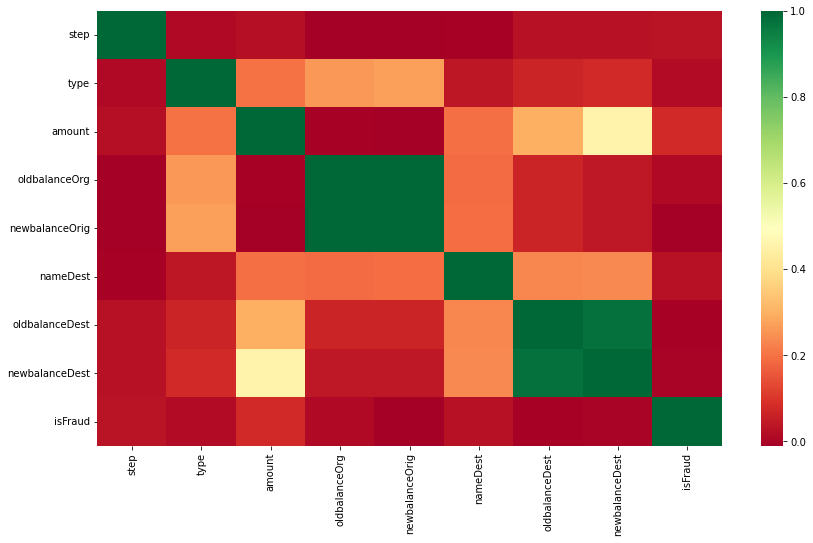

In [70]:
sns.heatmap(df.corr(),annot=False,cmap="RdYlGn")

In [73]:
# List Numerical Variable
numerical_features=[feature for feature in df.columns if df[feature].dtype!= 'O' and feature !="isFraud" ]
numerical_features

['step',
 'type',
 'amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'nameDest',
 'oldbalanceDest',
 'newbalanceDest']

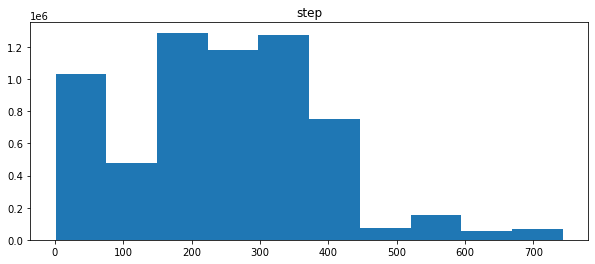

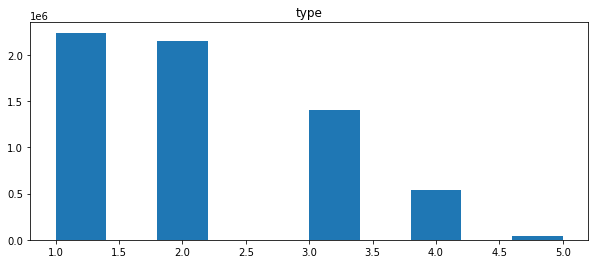

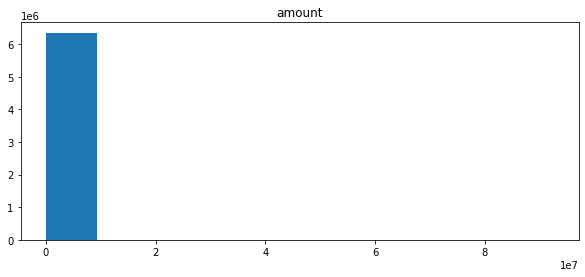

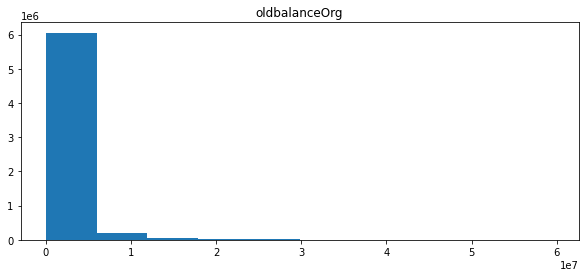

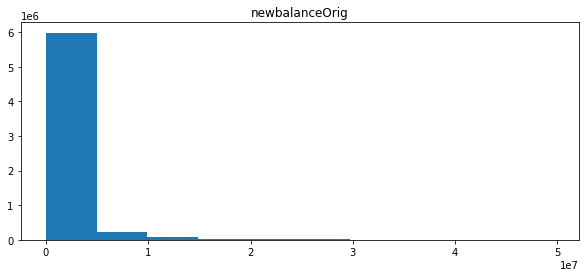

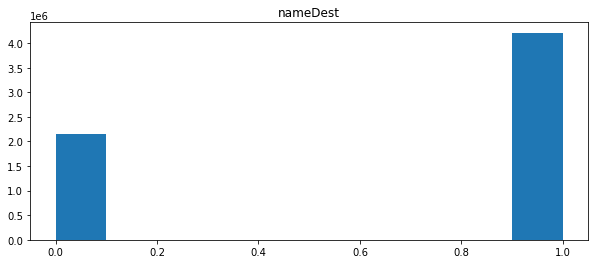

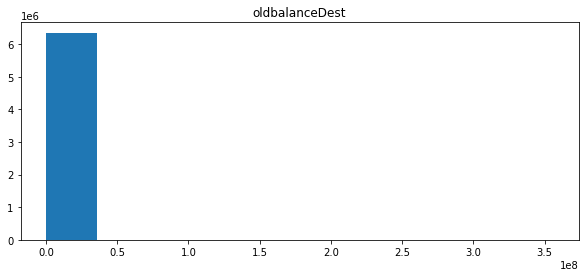

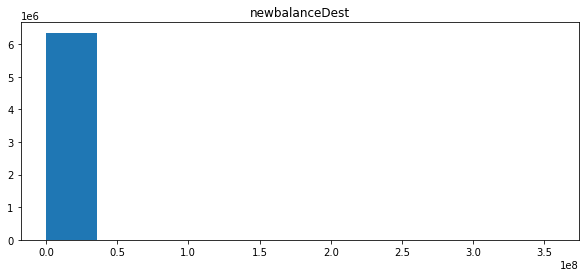

In [74]:
for feature in numerical_features:
    plt.figure(figsize=(10,4))
    plt.title(feature)
    plt.hist(df[feature])
    plt.show()

In [75]:
## Take some sample of the data

data= df.sample(frac = 0.1,random_state=1)
data.shape


(636262, 9)

In [76]:
#Determine the number of fraud and valid transactions in the dataset

Fraud = data[data['isFraud']==1]

Valid = data[data['isFraud']==0]

outlier_fraction = len(Fraud)/float(len(Valid))

In [77]:
print(outlier_fraction)

print("Fraud Cases : {}".format(len(Fraud)))

print("Valid Cases : {}".format(len(Valid)))

0.0012888646188564514
Fraud Cases : 819
Valid Cases : 635443


In [78]:
#Appling Log transformation 
for feature in numerical_features:
    data[feature]=np.log1p(df[feature])
    
   

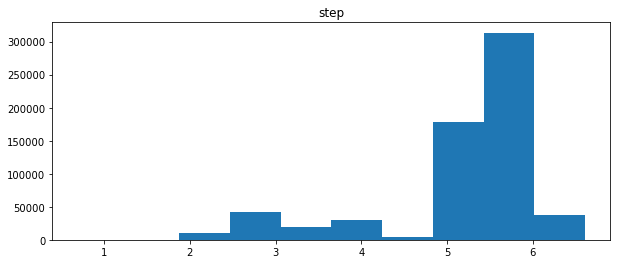

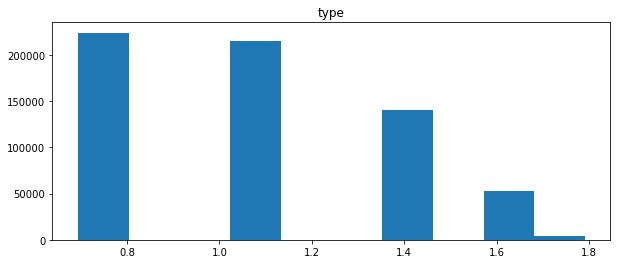

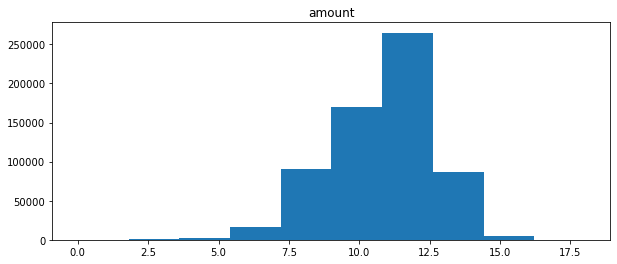

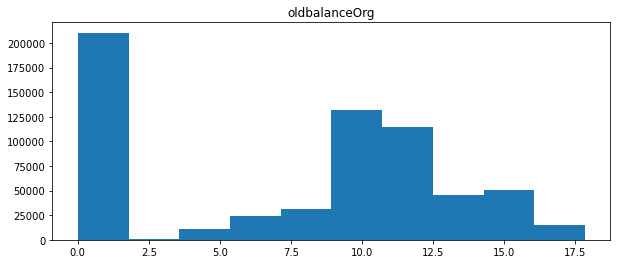

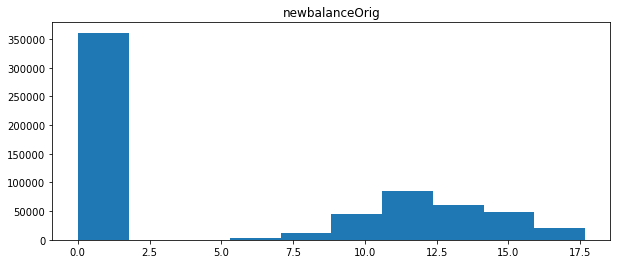

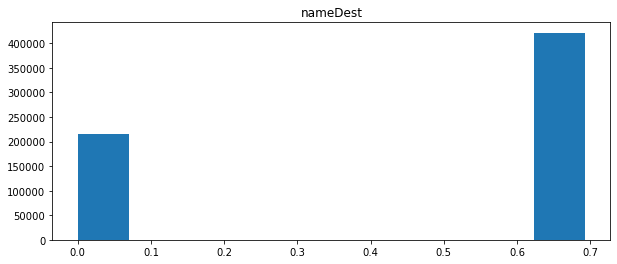

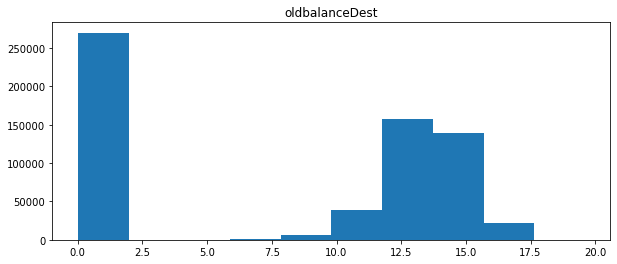

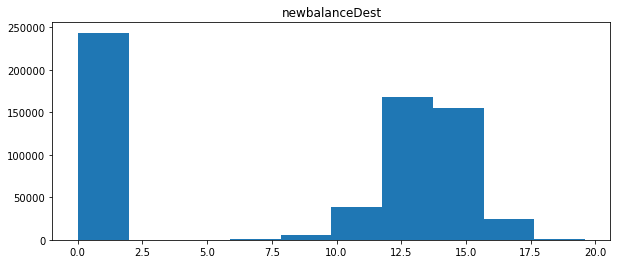

In [79]:
for feature in numerical_features:
    plt.figure(figsize=(10,4))
    plt.title(feature)
    plt.hist(data[feature])
    plt.show()

In [80]:
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
6322570,6.535241,1.386294,10.067226,8.994669,10.361454,0.693147,12.040665,11.891037,0
3621196,5.616771,1.098612,8.738275,0.000000,0.000000,0.000000,0.000000,0.000000,0
1226256,4.897840,1.098612,10.433612,9.838774,0.000000,0.000000,0.000000,0.000000,0
2803274,5.420535,0.693147,12.479938,9.907131,0.000000,0.693147,12.874555,13.389732,0
3201247,5.521461,0.693147,11.931733,9.941072,0.000000,0.693147,12.440038,12.910985,0


In [81]:
#Create independent and Dependent Features
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

# Define a random state 
state = np.random.RandomState(42)

X_outliers = state.uniform(low=0, high=1, size=(x.shape[0], x.shape[1]))
# Print the shapes of X & Y
print(x.shape)
print(y.shape)

(636262, 8)
(636262,)


In [82]:
y.head()

6322570    0
3621196    0
1226256    0
2803274    0
3201247    0
Name: isFraud, dtype: int64

In [83]:
#Define the outlier detection methods

classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(x), 
                                       contamination=outlier_fraction,random_state=state, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05, 
                                         max_iter=-1, random_state=state)
   
}

In [84]:
type(classifiers)

dict

In [ ]:
n_outliers = len(Fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(x)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(x)
        y_pred = clf.predict(x)
    else:    
        clf.fit(x)
        scores_prediction = clf.decision_function(x)
        y_pred = clf.predict(x)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(y,y_pred))
    print("Classification Report :")
    print(classification_report(y,y_pred))

C:\Users\so\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Isolation Forest: 1468
Accuracy Score :
0.9976927743602478
Classification Report :
             precision    recall  f1-score   support

          0       1.00      1.00      1.00    635443
          1       0.10      0.11      0.10       819

avg / total       1.00      1.00      1.00    636262



C:\Users\so\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Local Outlier Factor: 1556
Accuracy Score :
0.99755446655623
Classification Report :
             precision    recall  f1-score   support

          0       1.00      1.00      1.00    635443
          1       0.05      0.05      0.05       819

avg / total       1.00      1.00      1.00    636262

